In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'

import pandas as pd
df = pd.read_parquet(
    'data.parquet',
    engine='pyarrow'         # 저장 시 사용한 엔진과 동일하게 지정
)
test_loaded = pd.read_parquet(
    'test.parquet',
    engine='pyarrow'         # 저장 시 사용한 엔진과 동일하게 지정
)

# EDA

In [5]:
import itertools
import pandas as pd

def max_consecutive_nans(s: pd.Series) -> int:
   return max(
        (sum(1 for _ in grp) for is_na, grp in itertools.groupby(s.isna()) if is_na),
        default=0
    )

for col in ['SI','HM','TA','WD','WS','RN_DAY','RN_HR1','ta_chi']:
    max_len = max_consecutive_nans(df[col])
    print(f"{col} 최대 결측 연속 구간 길이: {max_len}")

SI 최대 결측 연속 구간 길이: 0
HM 최대 결측 연속 구간 길이: 0
TA 최대 결측 연속 구간 길이: 0
WD 최대 결측 연속 구간 길이: 0
WS 최대 결측 연속 구간 길이: 0
RN_DAY 최대 결측 연속 구간 길이: 0
RN_HR1 최대 결측 연속 구간 길이: 0
ta_chi 최대 결측 연속 구간 길이: 0


In [3]:
df.columns

Index(['TM', 'Line', 'station_number', 'station_name', 'Direction', 'STN',
       'TA', 'WD', 'WS', 'RN_DAY', 'RN_HR1', 'HM', 'ta_chi', 'Congestion',
       '신설역', '신규관측소', 'transfer', 'address', 'year', 'month', 'day', 'hour',
       'weekday', 'week_of_month', 'week_of_year', 'day_of_year', 'is_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_weekend',
       'time_period', 'sin_hod', 'cos_hod', 'sin_dow', 'cos_dow', 'sin_dom',
       'cos_dom', 'sin_wom', 'cos_wom', 'sin_woy', 'cos_woy', 'sin_doy',
       'cos_doy'],
      dtype='object')

# 기본 시계열 변수와 지하철 혼잡도 간의 상관분석

In [2]:
# 1) 시계열 변수
시계열변수 = [
    'day', 'day_of_year', 'hour', 'month',
    'week_of_month', 'week_of_year', 'weekday', 'year'
]

# 2) 삼각 변수
삼각변수 = [
    'sin_dom', 'cos_dom',
    'sin_dow', 'cos_dow',
    'sin_hod', 'cos_hod',
    'sin_wom', 'cos_wom',
    'sin_woy', 'cos_woy',
    'sin_doy', 'cos_doy'
]

# 3) 휴일·주말 변수
휴일주말변수 = [
    'is_day_before_holiday',
    'is_day_after_holiday',
    'is_holiday',
    'is_weekend'
]

# 4) 시간대 변수
시간대변수 = ['time_period']

# 5) 지하철 변수
지하철변수 = ['transfer', 'address','Direction', 'Line', 'STN', 'station_name', 'station_number', '신설역', '신규관측소']

# 6) 기상변수
기상변수 =  ['HM', 'RN_DAY', 'RN_HR1','TA', 'TM', 'WD','WS','ta_chi']

In [6]:
cond = df['Direction'].str.contains('내선|외선')
df.loc[cond,'Line'].unique()
print('내선외선은 2호선에만 존재하며 2호선에는 내선, 외선만 존재')

내선외선은 2호선에만 존재하며 2호선에는 내선, 외선만 존재


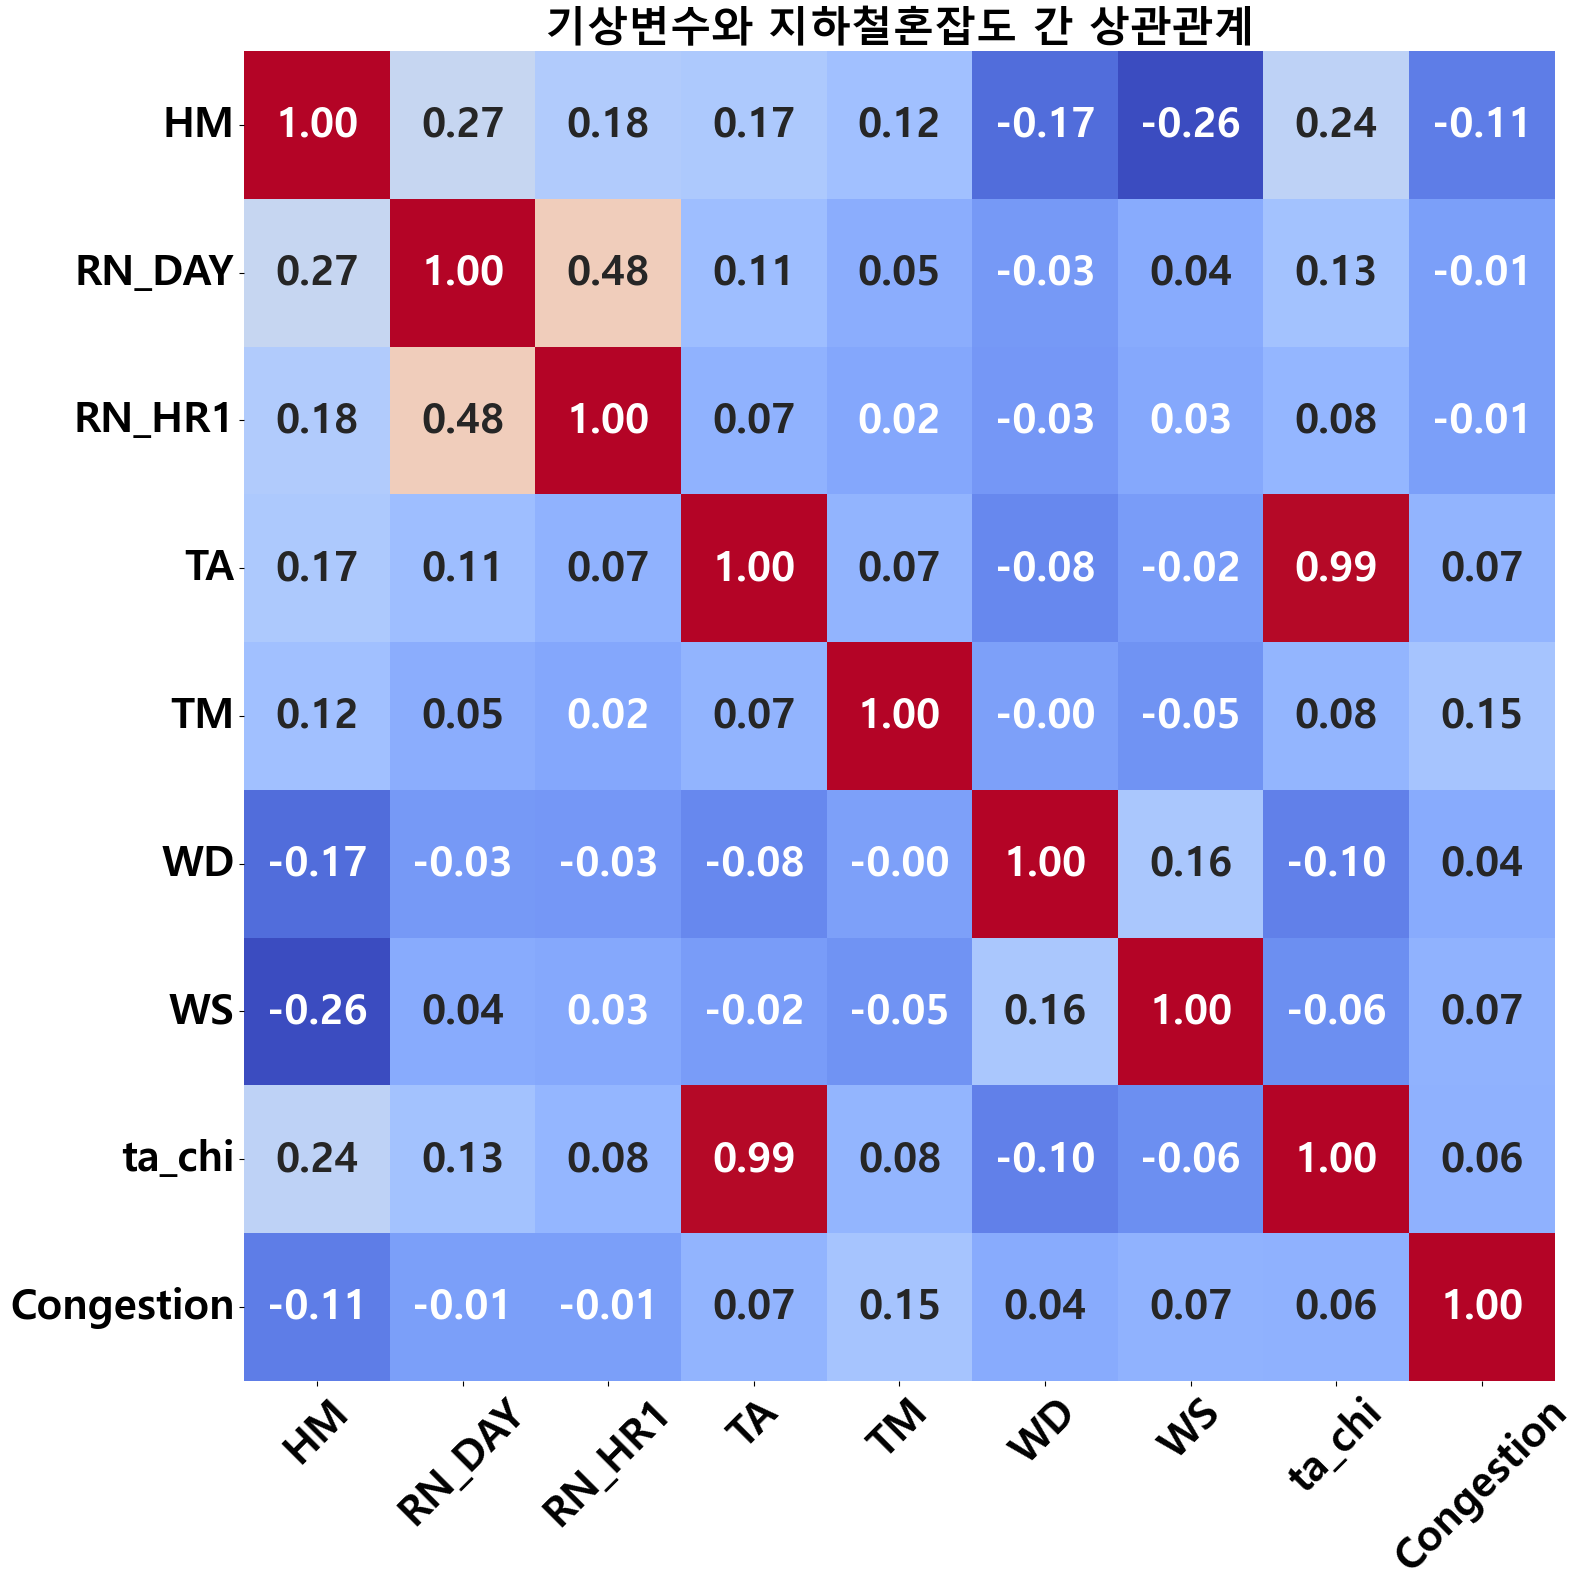

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

기상변수 =  ['HM', 'RN_DAY', 'RN_HR1','TA', 'TM', 'WD','WS','ta_chi']
cols = 기상변수 + ['Congestion']
df_corr = df[cols].copy()

corr_tab = df_corr.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(
    corr_tab,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=False,
    annot_kws={'fontsize': 30, 'fontweight': 'bold'} 
)

plt.title("기상변수와 지하철혼잡도 간 상관관계", fontsize=30, fontweight='bold')
plt.xticks(fontsize=30, fontweight='bold', rotation=45)
plt.yticks(fontsize=30, fontweight='bold', rotation=0)

plt.tight_layout()
plt.show()

In [6]:
df.columns

Index(['연월일', '년', '월', '시간', '시간_sin', '시간_cos', '호선', '역번호', '역명', '상하구분',
       'AWS지점코드', '기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도',
       '혼잡도', '승차총승객수', '하차총승객수', '미세먼지', '미세먼지_level', '요일', '휴일여부'],
      dtype='object')

In [16]:
cont_col = ['시간_sin', '시간_cos', 
      '기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도',
       '승차총승객수', '하차총승객수', '미세먼지']

cat_col = ['년', '월', '시간','호선', '미세먼지_level', '요일', '휴일여부']
df[cat_col] = df[cat_col].astype('category')